In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import mudata as md
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from utils.gglasso_pipeline import gg_lasso_network_analysis
from utils.utils import calc_sparsity
from sklearn.covariance import empirical_covariance
from scipy.stats import pearsonr
from tqdm import tqdm

In [2]:
ec_mudata = md.read("../data/preprocessed/mgh_mudata_prepro.h5mu")
ec_mudata

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


MuData object with n_obs × n_vars = 44170 × 7454
  3 modalities
    all_genes:	44170 x 3727
      obs:	'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
      var:	'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
      uns:	'genes_match', 'neighbors', 'protein_match', 'umap', 'unmatch_genes'
      obsm:	'X_pca', 'X_umap'
      layers:	'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'
      obsp:	'connectivities', 'distances'
    high_abundance_genes:	44170 x 2733
      obs:	'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
      var:	'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
      uns:	'genes_match', 'neighbors', 'protein_match', 'umap', 'unmatch_genes'
      obsm:	'X_pca', 'X_umap'
      layers:	'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'
      obsp:	'connectivities', 'distances'
    low_abundance_genes:	44170 x 994
      obs:	'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
      var:	'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
      uns:	'genes_match', 'neighbors', 'protein_match', 'umap', 'unmatch_genes'
      obsm:	'X_pca', 'X_umap'
      layers:	'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'
      obsp:	'connectivities', 'distances'

### Mean and Median of cell counts

In [3]:
print(np.mean(np.sum(ec_mudata["high_abundance_genes"].X.A, axis=1)))
print(np.median(np.sum(ec_mudata["high_abundance_genes"].X.A, axis=1)))

25.43439
20.0


### Mean and Median of gene counts

In [4]:
print(np.mean(np.sum(ec_mudata["high_abundance_genes"].X.A, axis=0)))
print(np.median(np.sum(ec_mudata["high_abundance_genes"].X.A, axis=0)))

411.06366
84.0


In [5]:
sns.clustermap(np.log1p(ec_mudata["high_abundance_genes"].X.A))

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [5]:
sc.pp.highly_variable_genes(ec_mudata["high_abundance_genes"], layer='raw_counts', n_top_genes=ec_mudata["high_abundance_genes"].shape[1], flavor='seurat_v3')

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='highly_variable_rank', ylabel='total_counts'>

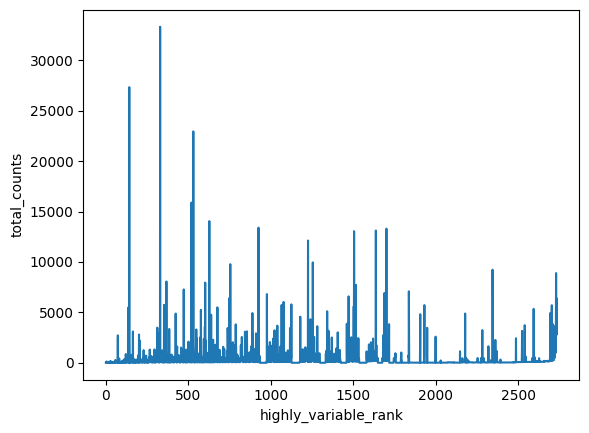

In [6]:
sns.lineplot(data=ec_mudata["high_abundance_genes"].var, x="highly_variable_rank", y="total_counts", color="C0")

### 200 HVG
Selecting the 200 (most) Highly Variables Genes for analysis

In [7]:
hag10_hcc15_hvg200 = ec_mudata["high_abundance_genes"][:, ec_mudata["high_abundance_genes"].var["highly_variable_rank"] <= 200].copy()
hag10_hcc15_hvg200

AnnData object with n_obs × n_vars = 44170 × 201
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'genes_match', 'neighbors', 'protein_match', 'umap', 'unmatch_genes', 'hvg'
    obsm: 'X_pca', 'X_umap'
    layers: 'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'
    obsp: 'connectivities', 'distances'

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

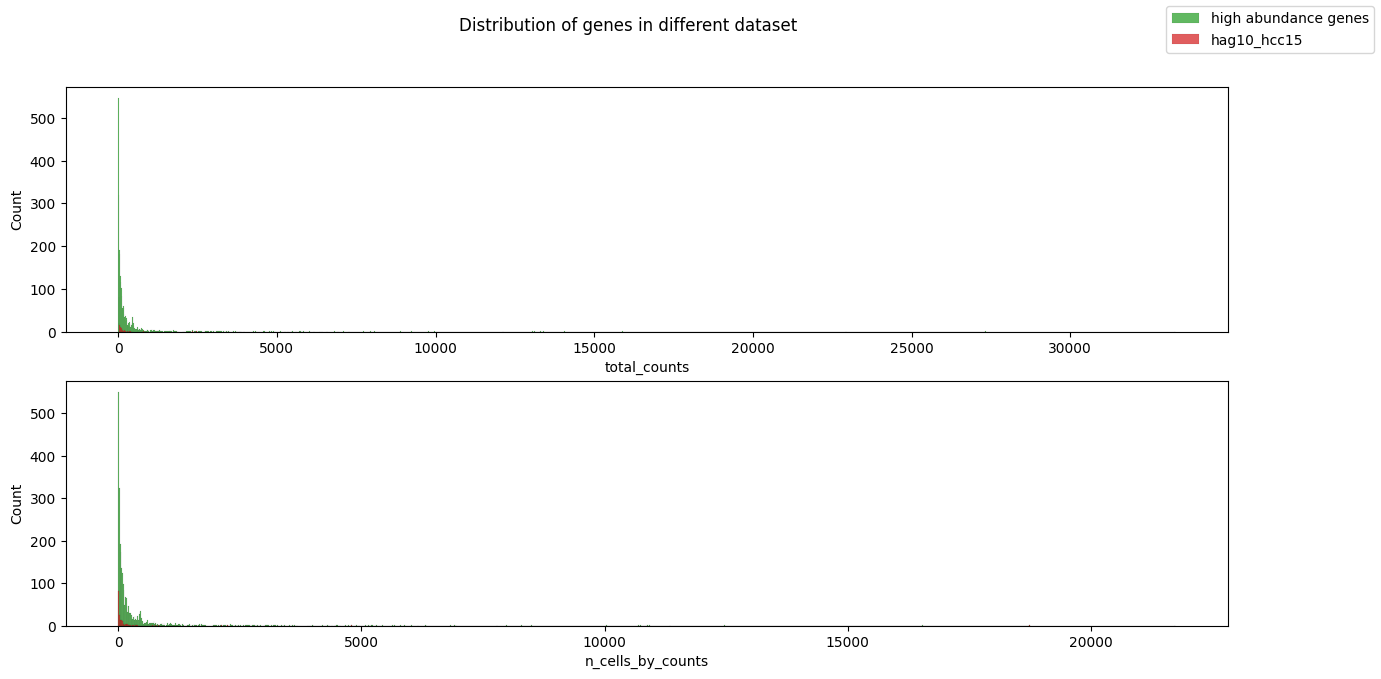

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(15,7))
sns.histplot(ec_mudata["high_abundance_genes"].var["total_counts"], binwidth=15, kde=False, color="C2", label="high abundance genes", ax=axes[0])
sns.histplot(hag10_hcc15_hvg200.var["total_counts"], binwidth=15, kde=False, color="C3", label="hag10_hcc15", ax=axes[0])

sns.histplot(ec_mudata["high_abundance_genes"].var["n_cells_by_counts"], binwidth=15, kde=False, color="C2", ax=axes[1])
sns.histplot(hag10_hcc15_hvg200.var["n_cells_by_counts"], binwidth=15, kde=False, color="C3", ax=axes[1])

#axes[0].set_title("Total counts for genes")
#axes[1].set_title("Amount of cells for genes")

fig.suptitle("Distribution of genes in different dataset")
fig.legend()

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of counts in each cell')

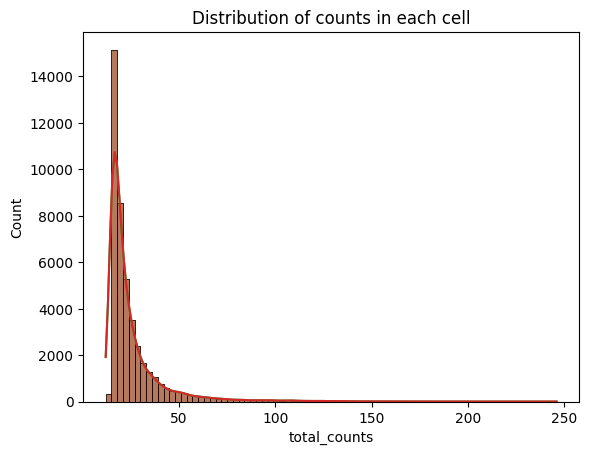

In [9]:
#fig, axes = plt.subplots(1, 1, figsize=(15,7))

sns.histplot(ec_mudata["high_abundance_genes"].obs["total_counts"], binwidth=3, kde=True, color="C2", label="high abundance genes",)
sns.histplot(hag10_hcc15_hvg200.obs["total_counts"], binwidth=3, kde=True, color="C3", label="hag10_hcc15",)

plt.title("Distribution of counts in each cell")

In [ ]:
sns.clustermap(np.log1p(hag10_hcc15_hvg200.X.A))

In [10]:
calc_sparsity(np.array(hag10_hcc15_hvg200.X.A,dtype=bool))

0.0054720736367967725

In [11]:
cov_hag10_hcc15_hvg200 = empirical_covariance(hag10_hcc15_hvg200.layers["sqrt_counts"].A)

In [12]:
ggl_est = gg_lasso_network_analysis(N=hag10_hcc15_hvg200.shape[0], estimate=cov_hag10_hcc15_hvg200)
ggl_est.create_problem(latent=False)
ggl_est.model_selection(lambda1_range=np.logspace(0, -5, 200))

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 16 iterations with status: optimal.
ADMM terminated after 17 iterations with status: optimal.
ADMM terminated after 20 iterations with status: optimal.
ADMM terminated after 21 iterations with status: optimal.
ADMM terminated after 21 iterations with status: optimal.
ADMM terminated after 21 iterations with status: optimal.
ADMM terminated after 22 iterations with status: optimal.
ADMM terminated after 22 iterations with status: optimal.
ADMM terminated after 21 iterations with status: optimal.
ADMM terminated after 21 iterations with status: optimal.
ADMM terminated after 21 iterations with status: optimal.
ADMM terminated after 21 iterations with status: optimal.
ADMM terminated after 21 iterations wi

In [ ]:
ggl_est.plot_graph_and_percision_matrix(fig_size=(10,10))

In [13]:
sol = ggl_est.P.solution.precision_

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


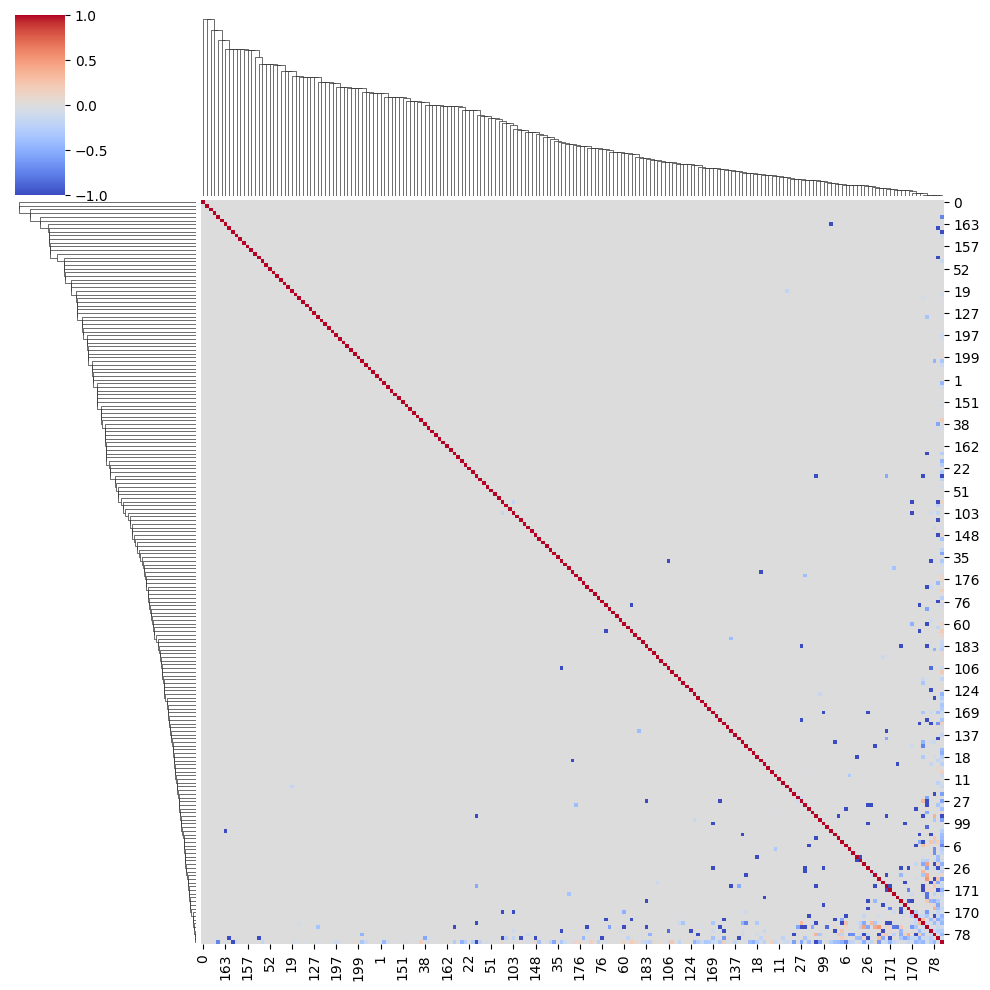

In [14]:
res = sns.clustermap(sol, cmap="coolwarm", vmin=-1, vmax=1)

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


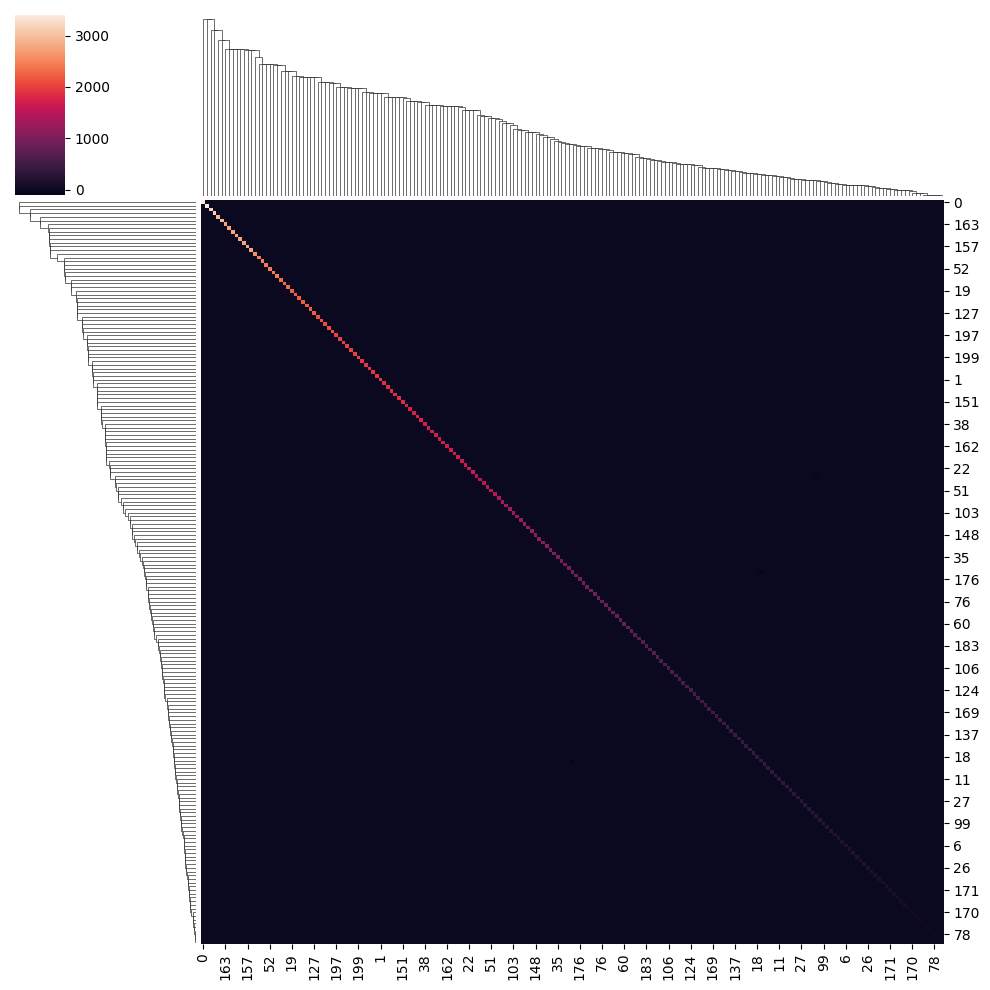

In [15]:
res = sns.clustermap(sol)


In [16]:
ggl_est.P.__dict__

{'S': array([[ 2.94255390e-04, -1.18401494e-07, -4.05947978e-07, ...,
         -4.90520474e-07, -1.12763327e-07,  4.45297254e-05],
        [-1.18401494e-07,  5.20489378e-04, -7.74991595e-07, ...,
         -9.36448178e-07, -2.15275443e-07, -1.43158170e-06],
        [-4.05947978e-07, -7.74991595e-07,  1.76324735e-03, ...,
         -3.21067947e-06, -7.38087234e-07, -4.90828010e-06],
        ...,
        [-4.90520474e-07, -9.36448178e-07, -3.21067947e-06, ...,
          2.14690150e-03, -8.91855407e-07,  1.67089623e-05],
        [-1.12763327e-07, -2.15275443e-07, -7.38087234e-07, ...,
         -8.91855407e-07,  4.97870593e-04, -1.36341114e-06],
        [ 4.45297254e-05, -1.43158170e-06, -4.90828010e-06, ...,
          1.67089623e-05, -1.36341114e-06,  3.45482283e-03]]),
 'N': 44170,
 'latent': False,
 'G': None,
 'do_scaling': False,
 'conforming': True,
 'multiple': False,
 'p': 201,
 'K': 1,
 'reg_params': {'lambda1': 0.00014314589375234786, 'mu1': 0},
 'modelselect_params': {'lambda1_ran

In [17]:
res.dendrogram_row.reordered_ind[:10]

[0, 63, 92, 128, 190, 65, 163, 119, 86, 56]

In [18]:
index_high_corr = hag10_hcc15_hvg200.var.index[res.dendrogram_row.reordered_ind[:10]]
index_high_corr

Index(['cds-AF52_RS0123640', 'cds-WP_002914114.1', 'cds-WP_004145564.1',
       'cds-WP_004200090.1', 'cds-WP_032430225.1', 'cds-WP_002914284.1',
       'cds-WP_023285550.1', 'cds-WP_004176956.1', 'cds-WP_004141101.1',
       'cds-WP_002913017.1'],
      dtype='object')

In [19]:
hag10_hcc15_hvg200[:,index_high_corr].var

,strains,matchin_protein,protein,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
cds-AF52_RS0123640,GSM5456503_Ec_CDS,no_match,no_match,10,0.000249,99.977360,11.0,10,True,35.0,0.000249,0.000294,1.173991
cds-WP_002914114.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_002914114.1,10,0.000249,99.977360,11.0,10,True,34.0,0.000249,0.000294,1.173991
cds-WP_004145564.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_004145564.1,11,0.000272,99.975096,12.0,11,True,42.0,0.000272,0.000317,1.153895
cds-WP_004200090.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_004200090.1,11,0.000272,99.975096,12.0,11,True,41.0,0.000272,0.000317,1.153895
cds-WP_032430225.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_032430225.1,12,0.000294,99.972832,13.0,12,True,50.0,0.000294,0.000340,1.137240
cds-WP_002914284.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_002914284.1,12,0.000294,99.972832,13.0,12,True,49.0,0.000294,0.000340,1.137240
cds-WP_023285550.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_023285550.1,13,0.000317,99.970568,14.0,13,True,65.0,0.000317,0.000362,1.123282
cds-WP_004176956.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_004176956.1,13,0.000317,99.970568,14.0,13,True,63.0,0.000317,0.000362,1.123282
cds-WP_004141101.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_004141101.1,13,0.000317,99.970568,14.0,13,True,60.0,0.000317,0.000362,1.123282
cds-WP_002913017.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_002913017.1,13,0.000317,99.970568,14.0,13,True,64.0,0.000317,0.000362,1.123282


In [20]:
hag10_hcc15_hvg200[:,28].var

,strains,matchin_protein,protein,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
cds-WP_002892997.1,GSM5456486_MGH66_Abx3_P1_align2,match,WP_002892997.1,16,0.000385,99.963776,17.0,16,True,92.0,0.000385,0.00043,1.092842


In [21]:
hag10_hcc15_hvg200.var.total_counts.value_counts()

total_counts
24.0     10
18.0      9
23.0      9
20.0      9
14.0      9
         ..
111.0     1
82.0      1
361.0     1
79.0      1
133.0     1
Name: count, Length: 106, dtype: int64